In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
!pip install seaborn

In [7]:

df = pd.read_csv(r'creditcard1.csv')

print("--- First 5 Rows ---")
print(df.head())

print("\n--- Data Information ---")
print(df.info())

print("\n--- Statistical Summary ---")
print(df.describe())

--- First 5 Rows ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26

In [8]:
classes = df['Class'].value_counts()
print("\n--- Class Counts ---")
print(classes)

normal_share = classes[0] / df['Class'].count() * 100
fraud_share = classes[1] / df['Class'].count() * 100

print(f"\nNormal Transactions: {normal_share:.3f}%")
print(f"Fraud Transactions: {fraud_share:.3f}%")


--- Class Counts ---
Class
0    284315
1       492
Name: count, dtype: int64

Normal Transactions: 99.827%
Fraud Transactions: 0.173%


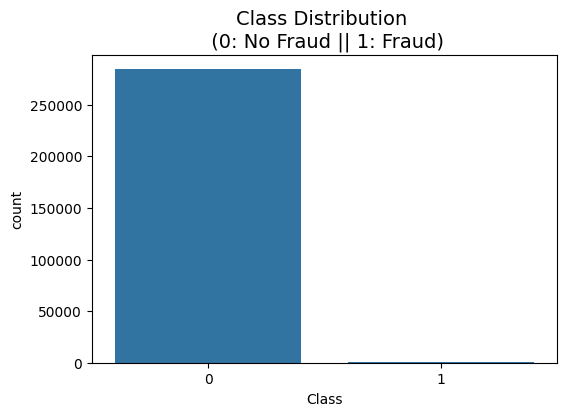

In [9]:
# Visualize it
# We use a bar chart because humans understand pictures better than numbers
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [10]:
# --- STEP 4: SCALING & TRANSFORMATION ---

from sklearn.preprocessing import StandardScaler, RobustScaler

# 1. Scale 'Amount'
# We use RobustScaler because it is less prone to outliers.
rob_scaler = RobustScaler()

# reshape(-1,1) is needed because the scaler expects a 2D array (a table), not a list.
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

# 2. Scale 'Time'
# We use StandardScaler here just to bring it to a manageable range.
std_scaler = StandardScaler()
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# 3. Clean Up
# Now we have 'scaled_amount' and 'scaled_time', we don't need the original raw columns.
# axis=1 means we are dropping "Columns", not rows.
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# 4. Reorder Columns (Optional, but nice for cleanliness)
# Let's put the scaled columns at the front so we can see them.
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# --- VERIFICATION ---
# Check the first 5 rows again.
# You should see small numbers for everything now.
print("Scaled Data Head:")
print(df.head())

Scaled Data Head:
   scaled_amount  scaled_time        V1        V2        V3        V4  \
0       1.783274    -1.996583 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -1.996583  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -1.996562 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -1.996562 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -1.996541 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28 

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)

y = df['Class']

# 2. Perform the Split
# test_size=0.2 means 20% of data is for testing.
# random_state=42 ensures we get the same split every time we run the code.
# stratify=y ensures the Fraud/Normal ratio is preserved in both sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# --- VERIFICATION ---

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

# Check the fraud percentage in the Test Set to ensure Stratify worked
unique, counts = np.unique(y_test, return_counts=True)
test_counts = dict(zip(unique, counts))
print("\nFraud Cases in Test Set:", test_counts[1])
print(f"Fraud Percentage in Test Set: {test_counts[1]/len(y_test)*100:.3f}%")

Training Set Shape: (227845, 30)
Test Set Shape: (56962, 30)

Fraud Cases in Test Set: 98
Fraud Percentage in Test Set: 0.172%


In [13]:
!pip install imbalanced-learn


   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]



In [15]:
print("Before SMOTE:")
print(y_train.value_counts())

# Initialize SMOTE
# sampling_strategy=1.0 means "Make the minority class equal to the majority class"
sm = SMOTE(sampling_strategy=1.0, random_state=42)

# Fit and resample ONLY the Training data
# This might take a few seconds
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Before SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64


In [16]:
# --- VERIFICATION ---
print("\nAfter SMOTE:")
print(y_train_res.value_counts())

# Check the new shape
print(f"\nOriginal Train Shape: {X_train.shape}")
print(f"Resampled Train Shape: {X_train_res.shape}")


After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64

Original Train Shape: (227845, 30)
Resampled Train Shape: (454902, 30)


In [17]:
# --- STEP 1: IMPORT MODEL ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# --- STEP 2: INITIALIZE MODEL ---
# n_estimators=100 means we build 100 decision trees.
# n_jobs=-1 means "use all computer power available".
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("Training Random Forest Model... (This might take 2-3 mins)")

# --- STEP 3: TRAIN (FIT) ---
# We train on the SMOTE-balanced data!
rf_model.fit(X_train_res, y_train_res)

print("Training Complete!")

# --- STEP 4: PREDICT ---
# CRITICAL: We predict on the ORIGINAL X_test (imbalanced).
# We want to see how the model performs in the "Real World", not the "Synthetic World".
y_pred = rf_model.predict(X_test)

# --- STEP 5: EVALUATE ---
print("\n--- Model Evaluation ---")
print("Accuracy Score:", accuracy_score(y_test, y_pred)) # Just for reference

print("\n--- Classification Report ---")
# This shows Precision, Recall, and F1-Score
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
# Row 1: Actual Normal | Row 2: Actual Fraud
# Col 1: Predicted Normal | Col 2: Predicted Fraud
cm = confusion_matrix(y_test, y_pred)

Training Random Forest Model... (This might take 2-3 mins)
Training Complete!

--- Model Evaluation ---
Accuracy Score: 0.9994908886626171

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


--- Confusion Matrix ---


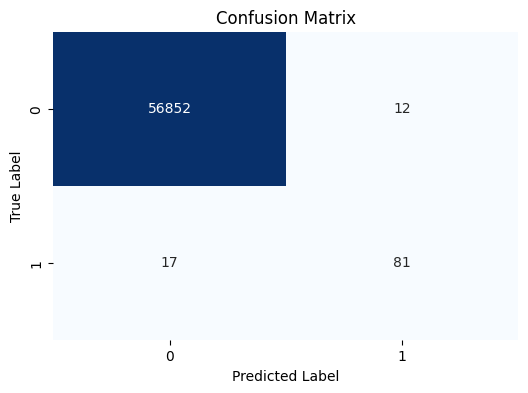

In [18]:
# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [19]:
# --- STEP 1: IMPORT SAVING LIBRARY ---
import joblib 

# Joblib is faster than Python's default 'pickle' for big arrays.

# --- STEP 2: SAVE THE MODEL ---
# We are saving the variable 'rf_model' to a file named 'fraud_detection_model.pkl'
joblib.dump(rf_model, 'fraud_detection_model.pkl')

# --- STEP 3: SAVE THE SCALER ---
# This is CRITICAL. We need the same math for future data.
# Note: In Phase 1, we used 'rob_scaler'. Make sure that variable is still in memory.
# If you restarted, you might need to rerun the scaling block.
joblib.dump(rob_scaler, 'scaler.pkl')

print("Success! Model and Scaler have been saved to disk.")

# --- STEP 4: VERIFY FILE EXISTENCE ---
# Let's check if the files are actually there.
import os
if os.path.exists('fraud_detection_model.pkl'):
    print("file 'fraud_detection_model.pkl' found.")
else:
    print("Error: Model file not found.")

Success! Model and Scaler have been saved to disk.
file 'fraud_detection_model.pkl' found.


In [21]:
import joblib
import pandas as pd
import numpy as np

# --- 1. THE SETUP (Load our saved 'Brain') ---
# We do this once at the start of the server
model = joblib.load('fraud_detection_model.pkl')
scaler = joblib.load('scaler.pkl')

# --- 2. THE DETECTION FUNCTION ---
def detect_fraud(transaction_data):
    """
    Simulates a real-time fraud check.
    Input: A dictionary or list containing the V1-V28, Time, and Amount.
    """
    
    # Convert input to DataFrame (Models love DataFrames)
    # We assume the order of columns is the same as training
    input_df = pd.DataFrame([transaction_data])
    
    # PREPROCESSING (Crucial!)
    # We must scale the Amount just like we did in Phase 1
    input_df['scaled_amount'] = scaler.transform(input_df[['Amount']].values)
    
    # We use a placeholder for 'scaled_time' since we don't have a time scaler
    # In a real app, you'd calculate "seconds since first transaction"
    input_df['scaled_time'] = 0 
    
    # Remove the raw Amount and original Time (just like we did in training)
    # Ensure column order matches exactly what the model saw
    # Order: scaled_amount, scaled_time, V1, V2 ... V28
    cols = ['scaled_amount', 'scaled_time'] + [f'V{i}' for i in range(1, 29)]
    input_df = input_df[cols]
    
    # MAKE PREDICTION
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0][1] # Probability of being fraud
    
    return prediction, probability

# --- 3. SIMULATING A LIVE TRANSACTION ---
# Let's create a fake transaction that looks like the real ones
sample_tx = {
    'Time': 0,
    'Amount': 5000.00, # A high amount
    'V1': -1.35, 'V2': -0.07, 'V3': 2.53, 'V4': 1.37, 'V5': -0.33,
    'V6': 0.46, 'V7': 0.23, 'V8': 0.09, 'V9': 0.36, 'V10': 0.09,
    'V11': -0.55, 'V12': -0.61, 'V13': -0.99, 'V14': -0.31, 'V15': 1.46,
    'V16': -0.47, 'V17': 0.20, 'V18': 0.02, 'V19': 0.40, 'V20': 0.25,
    'V21': -0.01, 'V22': 0.27, 'V23': -0.11, 'V24': 0.06, 'V25': 0.12,
    'V26': -0.18, 'V27': 0.13, 'V28': -0.02
}

is_fraud, prob = detect_fraud(sample_tx)

print(f"--- REAL-TIME SCAN ---")
print(f"Fraud Probability: {prob*100:.2f}%")
if is_fraud == 1:
    print("ALARM: High Risk Transaction! [BLOCKING...]")
else:
    print("Verdict: Transaction Approved.")

--- REAL-TIME SCAN ---
Fraud Probability: 3.00%
Verdict: Transaction Approved.


In [22]:
!pip install streamlit